In [1]:
# import des librairies dont nous aurons besoin
import pandas as pd
import numpy as np
import re

# chargement et affichage des données
data = pd.read_csv('personnes.csv')
print(data)

   prenom                                   email date_naissance  \
0   Leila                       leila@example.com     23/01/1990   
1  Samuel                  samuel_329@example.com     20/09/2001   
2   Radia                choupipoune@supermail.eu  12 sept. 1984   
3    Marc  marco23@example.com, mc23@supermail.eu     10/02/1978   
4    Heri                 helloworld@supermail.eu     05/03/2008   
5   Hanna                  hanna2019@supermail.eu     01/01/1970   
6  samuël                  samuel_329@example.com            NaN   

            pays taille  
0         France  1.49m  
1            NaN  1.67m  
2  Côte d'ivoire  153cm  
3         France  1.65m  
4     Madagascar  1.34m  
5             24  3.45m  
6          Bénin  1.45m  


In [2]:
print(data.isnull().sum())

prenom            0
email             0
date_naissance    1
pays              1
taille            0
dtype: int64


In [3]:
data.loc[data['email'].duplicated(keep=False),:]

,prenom,email,date_naissance,pays,taille
1,Samuel,samuel_329@example.com,20/09/2001,NaN,1.67m
6,samuël,samuel_329@example.com,NaN,Bénin,1.45m


In [6]:
VALID_COUNTRIES = ['France', 'Côte d\'ivoire', 'Madagascar', 'Bénin', 'Allemagne'
                  , 'USA']
mask = ~data['pays'].isin(VALID_COUNTRIES)
data.loc[mask, 'pays'] = np.NaN
print(data)

   prenom                                   email date_naissance  \
0   Leila                       leila@example.com     23/01/1990   
1  Samuel                  samuel_329@example.com     20/09/2001   
2   Radia                choupipoune@supermail.eu  12 sept. 1984   
3    Marc  marco23@example.com, mc23@supermail.eu     10/02/1978   
4    Heri                 helloworld@supermail.eu     05/03/2008   
5   Hanna                  hanna2019@supermail.eu     01/01/1970   
6  samuël                  samuel_329@example.com            NaN   

            pays taille  
0         France  1.49m  
1            NaN  1.67m  
2  Côte d'ivoire  153cm  
3         France  1.65m  
4     Madagascar  1.34m  
5            NaN  3.45m  
6          Bénin  1.45m  


In [8]:
data['email'] = data['email'].str.split(',', n=1, expand=True)[0]
print(data)

   prenom                     email date_naissance           pays taille
0   Leila         leila@example.com     23/01/1990         France  1.49m
1  Samuel    samuel_329@example.com     20/09/2001            NaN  1.67m
2   Radia  choupipoune@supermail.eu  12 sept. 1984  Côte d'ivoire  153cm
3    Marc       marco23@example.com     10/02/1978         France  1.65m
4    Heri   helloworld@supermail.eu     05/03/2008     Madagascar  1.34m
5   Hanna    hanna2019@supermail.eu     01/01/1970            NaN  3.45m
6  samuël    samuel_329@example.com            NaN          Bénin  1.45m


In [9]:
data['taille'] = data['taille'].str[:-1]
data['taille'] = pd.to_numeric(data['taille'], errors='coerce')
print(data)

   prenom                     email date_naissance           pays  taille
0   Leila         leila@example.com     23/01/1990         France    1.49
1  Samuel    samuel_329@example.com     20/09/2001            NaN    1.67
2   Radia  choupipoune@supermail.eu  12 sept. 1984  Côte d'ivoire     NaN
3    Marc       marco23@example.com     10/02/1978         France    1.65
4    Heri   helloworld@supermail.eu     05/03/2008     Madagascar    1.34
5   Hanna    hanna2019@supermail.eu     01/01/1970            NaN    3.45
6  samuël    samuel_329@example.com            NaN          Bénin    1.45


In [11]:
data.loc[data['taille'].isnull(), 'taille'] = data['taille'].mean()
print(data)

   prenom                     email date_naissance           pays    taille
0   Leila         leila@example.com     23/01/1990         France  1.490000
1  Samuel    samuel_329@example.com     20/09/2001            NaN  1.670000
2   Radia  choupipoune@supermail.eu  12 sept. 1984  Côte d'ivoire  1.841667
3    Marc       marco23@example.com     10/02/1978         France  1.650000
4    Heri   helloworld@supermail.eu     05/03/2008     Madagascar  1.340000
5   Hanna    hanna2019@supermail.eu     01/01/1970            NaN  3.450000
6  samuël    samuel_329@example.com            NaN          Bénin  1.450000


In [12]:
data['date_naissance'] = pd.to_datetime(data['date_naissance'], 
                                           format='%d/%m/%Y', errors='coerce')
print(data)

   prenom                     email date_naissance           pays    taille
0   Leila         leila@example.com     1990-01-23         France  1.490000
1  Samuel    samuel_329@example.com     2001-09-20            NaN  1.670000
2   Radia  choupipoune@supermail.eu            NaT  Côte d'ivoire  1.841667
3    Marc       marco23@example.com     1978-02-10         France  1.650000
4    Heri   helloworld@supermail.eu     2008-03-05     Madagascar  1.340000
5   Hanna    hanna2019@supermail.eu     1970-01-01            NaN  3.450000
6  samuël    samuel_329@example.com            NaT          Bénin  1.450000


In [25]:
# chargement et affichage des données
data = pd.read_csv('course+-+Quiz+P2.csv')
print(data)

     Position Sexe     Temps  Dept  Temps_secondes   Age
0           1    M  00:32:23    76          779543  40.0
1           2    M  00:32:40    27          779560  34.0
2           3    M  00:33:15    76          779595  44.0
3           4    M  00:33:23    76          779603  46.0
4           5    M  00:33:29    76          779609  26.0
..        ...  ...       ...   ...             ...   ...
335       336    F  01:08:34    27          781714  41.0
336       337    F  01:08:36    27          781716  48.0
337       338    M  01:09:31    27          781771  24.0
338       339    F  01:09:31    27          781771  25.0
339       340    F  01:10:31    76          781831  41.0

[340 rows x 6 columns]


In [26]:
mask = data['Dept'].isin([76,27,14])
data.loc[~mask, 'Dept']

21     78
35     78
74     78
255    78
289    78
Name: Dept, dtype: int64

In [27]:
print(data.isnull().sum())

Position          0
Sexe              2
Temps             0
Dept              0
Temps_secondes    0
Age               4
dtype: int64


In [28]:
data['Temps'] = pd.to_datetime(data['Temps'], 
                                           format='%H:%M:%S', errors='coerce').dt.time
print(data)

     Position Sexe     Temps  Dept  Temps_secondes   Age
0           1    M  00:32:23    76          779543  40.0
1           2    M  00:32:40    27          779560  34.0
2           3    M  00:33:15    76          779595  44.0
3           4    M  00:33:23    76          779603  46.0
4           5    M  00:33:29    76          779609  26.0
..        ...  ...       ...   ...             ...   ...
335       336    F  01:08:34    27          781714  41.0
336       337    F  01:08:36    27          781716  48.0
337       338    M  01:09:31    27          781771  24.0
338       339    F  01:09:31    27          781771  25.0
339       340    F  01:10:31    76          781831  41.0

[340 rows x 6 columns]


In [30]:
data.loc[data['Temps'].isnull(),:]

,Position,Sexe,Temps,Dept,Temps_secondes,Age
250,251,M,NaT,27,780887,42.0


In [33]:
data[['Position', 'Age', 'Temps_secondes']].describe()

,Position,Age,Temps_secondes
count,340.000000,336.000000,340.000000
mean,177.061765,42.145833,780553.123529
std,166.584054,13.963690,514.526264
min,-100.000000,18.000000,779543.000000
25%,85.750000,34.000000,780200.500000
50%,170.500000,41.500000,780536.500000
75%,255.250000,49.250000,780906.500000
max,2640.000000,174.000000,781831.000000


In [42]:
data.loc[data[['Position', 'Temps']].duplicated(keep=False),:]

,Position,Sexe,Temps,Dept,Temps_secondes,Age


In [41]:
data.loc[~data['Sexe'].isin(['F','M']),'Sexe']

93       O
109    NaN
167      O
291    NaN
Name: Sexe, dtype: object

In [44]:
data['Sexe'].unique()

array(['M', 'F', 'O', nan], dtype=object)

In [45]:
# chargement et affichage des données
data = pd.read_csv('course+-+Quiz+P4+(1).csv')
print(data)

     Position Sexe     Temps  Dept  Temps_secondes  Age
0           1    M  00:32:23    76         1643543   40
1           2    M  00:32:40    27         1643560   34
2           3    M  00:33:15    76         1643595   44
3           4    M  00:33:23    76         1643603   46
4           5    M  00:33:29    76         1643609   26
..        ...  ...       ...   ...             ...  ...
335       336    F  01:08:34    27         1645714   41
336       337    F  01:08:36    27         1645716   48
337       338    M  01:09:31    27         1645771   24
338       339    F  01:09:31    27         1645771   25
339       340    F  01:10:31    76         1645831   41

[340 rows x 6 columns]


In [48]:
data.describe()

,Position,Dept,Temps_secondes,Age
count,340.000000,340.000000,3.400000e+02,340.000000
mean,170.500000,56.991176,1.644553e+06,41.950000
std,98.293777,25.059279,5.145263e+02,12.092094
min,1.000000,14.000000,1.643543e+06,18.000000
25%,85.750000,27.000000,1.644200e+06,34.000000
50%,170.500000,76.000000,1.644536e+06,42.000000
75%,255.250000,76.000000,1.644906e+06,50.000000
max,340.000000,78.000000,1.645831e+06,74.000000


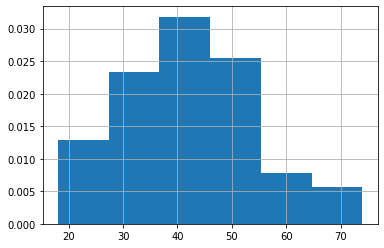

In [49]:
import matplotlib.pyplot as plt
# Histogramme plus beau
data["Age"].hist(density=True,bins=6)
plt.show()

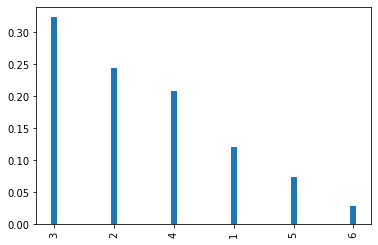

In [68]:
data['six_Age'] = [int((age-18)/10)+1 for age in data["Age"]]
# Diagramme en bâtons
data["six_Age"].value_counts(normalize=True).plot(kind='bar',width=0.1)
plt.show()

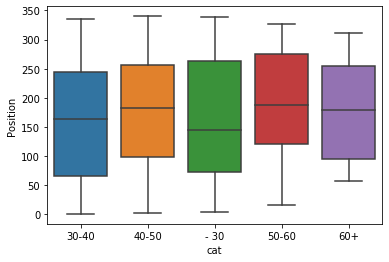

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

data['cat'] = 0
data.loc[data['Age'] <= 30, 'cat'] = '- 30'
data.loc[(data['Age'] > 30) & (data['Age'] <= 40), 'cat'] = '30-40'
data.loc[(data['Age'] > 40) & (data['Age'] <= 50), 'cat'] = '40-50'
data.loc[(data['Age'] > 50) & (data['Age'] <= 60), 'cat'] = '50-60'
data.loc[(data['Age'] > 60), 'cat'] = '60+'

sns.boxplot(y='Position', x='cat', data=data, orient='v')
plt.show()

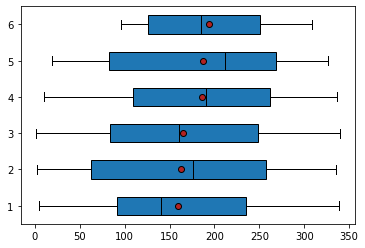

In [69]:
X = "six_Age"
Y = "Position"

modalites = data.sort_values([X]).six_Age.unique()
groupes = []
for m in modalites:
    groupes.append(data[data[X]==m][Y])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

In [74]:
import scipy.stats as st
print(st.pearsonr(data[X], data[Y])[0])
data.corr()

0.10287675361226731


,Position,Dept,Temps_secondes,Age,six_Age
Position,1.000000,-0.175935,0.987919,0.106065,0.102877
Dept,-0.175935,1.000000,-0.182632,-0.034482,-0.029165
Temps_secondes,0.987919,-0.182632,1.000000,0.094927,0.094198
Age,0.106065,-0.034482,0.094927,1.000000,0.973305
six_Age,0.102877,-0.029165,0.094198,0.973305,1.000000


In [77]:
import statsmodels.formula.api as smf
result = smf.ols('Position~Age', data).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Position   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     3.846
Date:                Tue, 22 Feb 2022   Prob (F-statistic):             0.0507
Time:                        14:35:00   Log-Likelihood:                -2039.9
No. Observations:                 340   AIC:                             4084.
Df Residuals:                     338   BIC:                             4092.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    134.3317     19.192      6.999      0.000      96.581     172.083
Age            0.8622      0.440      1.961      0.051      -0.003       1.727
==============================================================================
Omnibus:                      168.219   Durbin-Watson:                   0.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.775
Skew:                           0.034   Prob(JB):                     5.08e-05
Kurtosis:                       1.821   Cond. No.                         158.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
X = "Sexe" # qualitative
Y = "Temps_secondes" # quantitative

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
eta_squared(data[X],data[Y])

0.20400517398334017